Consider three sinusoids with the following amplitudes and phases:

$x_1(t) = 5cos(2\pi(500)t)$

$x_1(t) = 5cos(2\pi(500)t + 0.25\pi)$

$x_1(t) = 5cos(2\pi(500)t + 0.5\pi)$

a. Create a program to sample each sinusoid and generate a sum of three sinusoids, that is, $x(n) = x_1(n) + x_2(n) + x_3(n)$, using a sampling rate of 8,000 Hz. Plot x(n)
over a range of 0.01 seconds.

b. Use the function fft() to compute DFT coefficients, and plot and examine the
spectrum of the signal x(n).

In [270]:
import numpy as np
import matplotlib.pyplot as plt

In [271]:
# Parameters
f = 500
fs = 8000
T = 1/fs
t = np.arange(0, 1, T)

In [272]:
# Signals
x1 = 5 * np.cos(2*np.pi*f*t)
x2 = 5 * np.cos((2*np.pi*f*t) + (0.25*np.pi))
x3 = 5 * np.cos((2*np.pi*f*t) + (0.5*np.pi))
x = x1 + x2 + x3

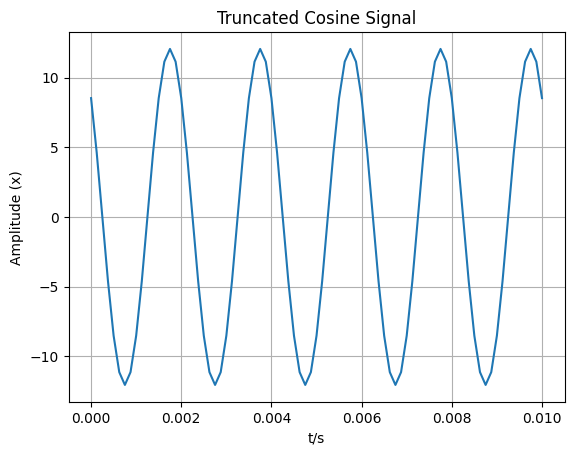

In [273]:
# Plot for tuncated signal [0 to 0.01s]
mask = (t >= 0) & (t <= 0.01)
t_trunc = t[mask]
x_trunc = x[mask]

# Plot
plt.plot(t_trunc, x_trunc)
plt.xlabel("t/s")
plt.ylabel("Amplitude (x)")
plt.title("Truncated Cosine Signal")
plt.grid(True)
plt.show()

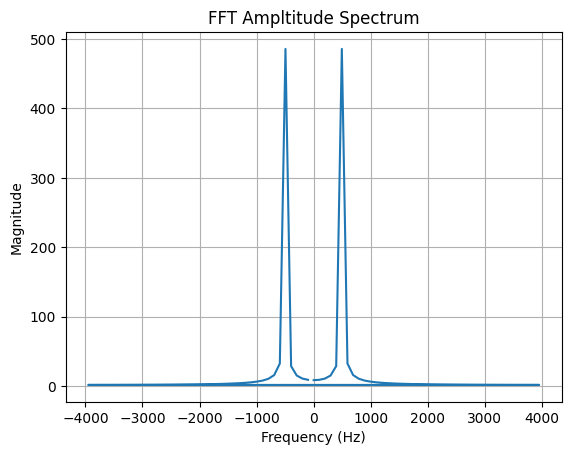

In [274]:
# Employing the FFT
N = len(x_trunc)

X = np.fft.fft(x_trunc)

freq = np.fft.fftfreq(N, d=1/fs)    # Frequency Values

plt.plot(freq[:N], np.abs(X[:N]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT Ampltitude Spectrum")
plt.grid(True)
plt.show()

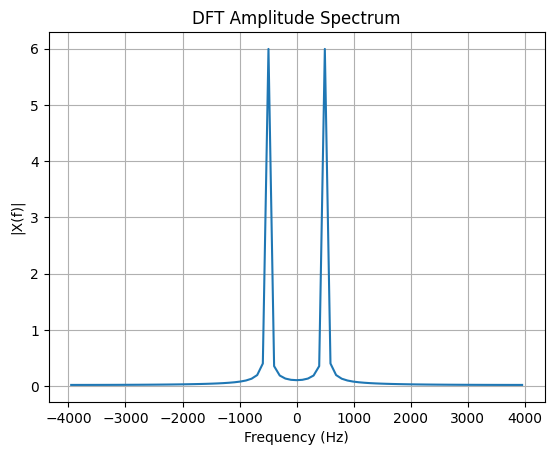

In [275]:
# Employing the DFT

N = len(x_trunc)    # Length of the DFT
result = np.zeros(N, dtype=complex)   # Array to store DFT results
amp = np.zeros(N)   # Array to store amplitude results

# DFT formula implementation
for k in range(N):
    for i in range(N):
        result[k] += x_trunc[i] * np.exp(-1j * 2 * np.pi * k * i / N)

result_shifted = np.roll(result, N//2)   # Shifting the DFT for double-sided spectrum

# Corresponding frequency values
freq = np.zeros(N)
for a in range(N):
    freq[a] = (a - N//2) * fs / N

# Amplitude spectrum
amp = np.zeros(N)
for a in range(N):
    amp[a] = (1/N) * np.sqrt(result_shifted[a].real**2 + result_shifted[a].imag**2)

# Plot double-sided amplitude spectrum
plt.plot(freq, amp)
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X(f)|")
plt.title("DFT Amplitude Spectrum")
plt.grid(True)
plt.show()

- The amplitude values of the DFT are so because of the normalization parameter, 1/N. However, both the DFT and FFT showed spikes/peaks at the signal's frequency component - 500Hz.

- The FFT algorithm computes the DFT efficiently. Even for large N as compared to the raw DFT calculation, which takes much longer. That’s why I truncated the signal, to reduce N and speed up computation.

- The DFT is code I wrote from the ground up. While it looks a bit bulky, it produces correct results, and further optimizations would be done.